# Convolutional Neural Network (CNN)

### Import TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.utils import shuffle

TF Version

TF version

**Data - Google Drive - usar acesso ao google drive ou link alternativo abaixo**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path = "/content/gdrive/My Drive/Projects/DotsAndBoxes/InitialTests/"
%cd $path

/content/gdrive/My Drive/Projects/DotsAndBoxes/InitialTests


In [4]:
gamesPath = path + "Results/input.txt"
valuesPath = path + "Results/values.txt"
policyPath = path + "Results/policy.txt"
predictPath = path + "Results/predict.txt"

**Data - Link Alternativo**

In [ ]:
link1 = "https://drive.google.com/u/1/uc?id=1-4zdSBPX03884ljn40ePX3xmukfmFSXy&export=download"
link2 = "https://drive.google.com/u/1/uc?id=100ok0_oNduuKNCJe8QRHxdvtplRY5zDo&export=download"
link3 = "https://drive.google.com/u/1/uc?id=1Dp0hRwAQ74EfI4cOllrKdhVtv-bmuOlf&export=download"

In [ ]:
import requests
import gdown

games = 'input.txt'
gdown.download(link1, games, quiet=False) 

labels = 'input2.txt'
gdown.download(link2, labels, quiet=False) 

predict = 'predict.txt'
gdown.download(link3, predict, quiet=False) 

Downloading...
From: https://drive.google.com/u/1/uc?id=10y3bzzqvWjSjP2naArfi_njvL5_AGLur&export=download
To: /content/input.txt
4.03MB [00:00, 108MB/s]
Downloading...
From: https://drive.google.com/u/1/uc?id=1-pIYt46ZfCW4e69Wz641ZyvetQp33HP4&export=download
To: /content/input2.txt
100%|██████████| 14.7k/14.7k [00:00<00:00, 3.34MB/s]
Downloading...
From: https://drive.google.com/u/1/uc?id=1Dp0hRwAQ74EfI4cOllrKdhVtv-bmuOlf&export=download
To: /content/predict.txt
100%|██████████| 19.6k/19.6k [00:00<00:00, 6.28MB/s]


'predict.txt'

**Dots 3x3**

Estados gerados de 300 jogos, com 10 jogadas anteriores, num total de 3000 jogadas
(300 x 24) 3000 x 10 x 7 x 4

300  Jogos
24   Jogadas (total do tabuleiro)
3000 Jogadas considerando os 500 jogos
10   Estado com historico de 10 tabuleiros anteriores
7    linhas + colunas
4    elementos por linha 

Label = Jogos ganhos

Test

In [ ]:
arr = np.loadtxt(games, dtype=float)
arr = arr.reshape(12000, 7, 4)
arrtr, arrtest = arr[:10000,:], arr[10000:,:]

arr2 = np.loadtxt(labels, dtype=float)
arr2 = arr2.reshape(12000, 1)
arr2tr, arr2test = arr2[:10000,:], arr2[10000:,:]

arr3 = np.loadtxt(labels, dtype=float)
arr3 = arr3.reshape(12000, 1)
arr3tr, arr3test = arr3[:10000,:], arr3[10000:,:]

In [ ]:
arr = np.loadtxt(games, dtype=float)
arr = arr.reshape(12000, 7, 4)
arrtr, arrtest = arr[:10000,:], arr[10000:,:]

arr2 = np.loadtxt(labels, dtype=float)
arr2 = arr2.reshape(12000, 1)
arr2tr, arr2test = arr2[:10000,:], arr2[10000:,:]

arr3 = np.loadtxt(labels, dtype=float)
arr3 = arr3.reshape(12000, 1)
arr3tr, arr3test = arr3[:10000,:], arr3[10000:,:]

In [ ]:
arr = np.loadtxt(games, dtype=float)
arr = arr.reshape(1, 7, 4)
arrtr, arrtest = arr[:3072,:], arr[3072:,:]
 
arr2 = np.loadtxt(policy, dtype=float)
arr2 = arr2.reshape(3840, 28)
arr2tr, arr2test = arr2[:3072,:], arr2[3072:,:]
 
arr3 = np.loadtxt(values, dtype=float)
arr3 = arr3.reshape(3840, 1)
arr3tr, arr3test = arr3[:3072,:], arr3[3072:,:]

In [5]:
NumberOfGames= 500
size = NumberOfGames * 8 * 24
size80 = int(size * 0.8)

games = np.loadtxt(gamesPath, dtype=float)
games = games.reshape(size, 7, 4)
policy = np.loadtxt(policyPath, dtype=float)
policy = policy.reshape(size, 28)
values = np.loadtxt(valuesPath, dtype=float)
values = values.reshape(size, 1)

games, policy, values = shuffle(games, policy, values)

#c = list(zip(games, policy, values))
#np.random.shuffle(c)
#games, policy, values = list(zip(*c))
#games = np.asarray(games)
#policy = np.asarray(policy)
#values = np.array(values)

gamestr, gamestest = games[:size80,:], games[size80:,:]
policytr, policytest = policy[:size80,:], policy[size80:,:]
valuestr, valuestest = values[:size80,:], values[size80:,:]

In [ ]:
NumberOfGames= 500
size = NumberOfGames * 24
size80 = int(size * 0.8)

games = np.loadtxt(gamesPath, dtype=float)
games = games.reshape(8 * size, 8, 7, 4)
policy = np.loadtxt(policyPath, dtype=float)
policy = policy.reshape(8 * size, 224)
values = np.loadtxt(valuesPath, dtype=float)
values = values.reshape(8 * size, 8, 1)

games, policy, values = shuffle(games, policy, values)

#c = list(zip(games, policy, values))
#np.random.shuffle(c)
#games, policy, values = list(zip(*c))
#games = np.asarray(games)
#policy = np.asarray(policy)
#values = np.array(values)

gamestr, gamestest = games[:size80,:], games[size80:,:]
policytr, policytest = policy[:size80,:], policy[size80:,:]
valuestr, valuestest = values[:size80,:], values[size80:,:]

ValueError: ignored

In [ ]:
policy[0]

array([0.00000000e+00, 3.79300000e-42, 1.59551990e-27, 0.00000000e+00,
       4.07213500e-33, 1.00000000e+00, 0.00000000e+00, 2.32518920e-29,
       3.79247130e-32, 5.80846900e-27, 3.97669440e-36, 0.00000000e+00,
       0.00000000e+00, 3.88349000e-39, 1.07127925e-33, 3.18301850e-24,
       0.00000000e+00, 3.79300000e-42, 0.00000000e+00, 0.00000000e+00,
       2.23941630e-27, 1.12331770e-27, 5.35372120e-28, 2.18693000e-30,
       3.97669440e-36, 3.70358520e-35, 0.00000000e+00, 0.00000000e+00])

In [ ]:
games.size

5376000

In [ ]:
gamestr.size

4300800

In [ ]:
gamestest.size

1075200

In [ ]:
# adjust
arr3 = arr2[:,28]
arr3 = arr3.reshape(size, 1)

with np.nditer(arr3, op_flags=['readwrite']) as it:
   for x in it:
      if x[...] == 0:
        x[...] = -1

arr3tr, arr3test = arr3[:size80,:], arr3[size80:,:]

Official

In [ ]:
arr = np.loadtxt(games, dtype=float)
arr = arr.reshape(3600, 11, 7, 4)
arrtr, arrtest = arr[:3000,:], arr[3000:,:]

arr2 = np.loadtxt(labels, dtype=float)
arr2 = arr2.reshape(3600, 1)
arr2tr, arr2test = arr2[:3000,:], arr2[3000:,:]

ValueError: ignored

### Create the convolutional base

2D
Teste

In [ ]:
state = layers.Input(shape=(8, 7, 4), name="state_8_7_4")
size = 8 * 7 * 4
conv_1 = (layers.Activation('relu', name="act1")(layers.BatchNormalization(axis=1, name="batch1")(layers.Conv2D(filters=256, kernel_size=(3, 3), name='conv_1')(state))))
conv_2 = (layers.Activation('relu', name="act2")(layers.BatchNormalization(axis=1, name="batch2")(layers.Conv2D(filters=256, kernel_size=(3, 3), name='conv_2')(conv_1))))
conv_3 = (layers.Activation('relu', name="act3")(layers.BatchNormalization(axis=1, name="batch3")(layers.Conv2D(filters=256, kernel_size=(3, 3), name='conv_3')(conv_2))))
conv_4 = (layers.Activation('relu', name="act4")(layers.BatchNormalization(axis=1, name="batch4")(layers.Conv2D(filters=2, kernel_size=(1, 1), name='conv_4')(conv_3))))
flat = layers.Flatten(name="flatten")(conv_4)
pi = layers.Dense(size, activation='softmax', name='policy_net')(flat)   
v = layers.Dense(1, activation='tanh', name='value_net')(flat)          
 
model = models.Model(inputs=state, outputs=[pi, v], name="noConv8x7x4")
model.summary()

Model: "noConv8x7x4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
state_8_7_4 (InputLayer)        [(None, 8, 7, 4)]    0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 6, 5, 256)    9472        state_8_7_4[0][0]                
__________________________________________________________________________________________________
batch1 (BatchNormalization)     (None, 6, 5, 256)    24          conv_1[0][0]                     
__________________________________________________________________________________________________
act1 (Activation)               (None, 6, 5, 256)    0           batch1[0][0]                     
________________________________________________________________________________________

# Experimental sem convolutional

https://github.com/suragnair/alpha-zero-general/blob/master/dotsandboxes/keras/DotsAndBoxesNNet.py

In [ ]:
dropout = 0.3
state = layers.Input(shape=(7, 4), name="state_7_4")
size = 7 * 4
flat = layers.Flatten(name="flatten")(state)
s_fc1 = layers.Dropout(dropout, name="drop1")(layers.Activation('relu', name="act1")(layers.BatchNormalization(axis=1, name="batch1")(layers.Dense(1024, name="dense1")(flat))))  # batch_size x 1024
s_fc2 = layers.Dropout(dropout, name="drop2")(layers.Activation('relu', name="act2")(layers.BatchNormalization(axis=1, name="batch2")(layers.Dense(1024, name="dense2")(s_fc1))))  # batch_size x 1024
s_fc3 = layers.Dropout(dropout, name="drop3")(layers.Activation('relu', name="act3")(layers.BatchNormalization(axis=1, name="batch3")(layers.Dense(1024, name="dense3")(s_fc2))))  # batch_size x 1024
s_fc4 = layers.Dropout(dropout, name="drop4")(layers.Activation('relu', name="act4")(layers.BatchNormalization(axis=1, name="batch4")(layers.Dense(512, name="dense4")(s_fc3))))   # batch_size x 1024
pi = layers.Dense(size, activation='softmax', name='policy_net')(s_fc4)   # batch_size x self.action_size
v = layers.Dense(1, activation='tanh', name='value_net')(s_fc4)           # batch_size x 1
 
model = models.Model(inputs=state, outputs=[pi, v], name="noConv7x4")
model.summary()

Model: "noConv7x4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
state_7_4 (InputLayer)          [(None, 7, 4)]       0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 28)           0           state_7_4[0][0]                  
__________________________________________________________________________________________________
dense1 (Dense)                  (None, 1024)         29696       flatten[0][0]                    
__________________________________________________________________________________________________
batch1 (BatchNormalization)     (None, 1024)         4096        dense1[0][0]                     
__________________________________________________________________________________________

In [6]:
dropout = 0.3
state = layers.Input(shape=(7, 4), name="state_7_4")
size = 7 * 4
flat = layers.Flatten(name="flatten")(state)
s_fc1 = layers.Dropout(dropout, name="drop1")(layers.Activation('relu', name="act1")(layers.BatchNormalization(axis=1, name="batch1")(layers.Dense(1024, name="dense1")(flat))))  # batch_size x 1024
s_fc2 = layers.Dropout(dropout, name="drop2")(layers.Activation('relu', name="act2")(layers.BatchNormalization(axis=1, name="batch2")(layers.Dense(256, name="dense2")(s_fc1))))  # batch_size x 1024
s_fc3 = layers.Dropout(dropout, name="drop3")(layers.Activation('relu', name="act3")(layers.BatchNormalization(axis=1, name="batch3")(layers.Dense(128, name="dense3")(s_fc2))))  # batch_size x 1024
pi = layers.Dense(size, activation='softmax', name='policy_net')(s_fc3)   # batch_size x self.action_size
v = layers.Dense(1, activation='tanh', name='value_net')(s_fc3)           # batch_size x 1
 
model = models.Model(inputs=state, outputs=[pi, v], name="noConv7x4")
model.summary()

Model: "noConv7x4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
state_7_4 (InputLayer)          [(None, 7, 4)]       0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 28)           0           state_7_4[0][0]                  
__________________________________________________________________________________________________
dense1 (Dense)                  (None, 1024)         29696       flatten[0][0]                    
__________________________________________________________________________________________________
batch1 (BatchNormalization)     (None, 1024)         4096        dense1[0][0]                     
__________________________________________________________________________________________

# fim experimental

In [ ]:
with open('Results/model.json', mode='r') as f33:
    loadedModel = tf.keras.models.model_from_json('model.json');

JSONDecodeError: ignored

### Compile and train the model

Utilizei o mean squared error e resultou, mas não sei se tem melhor

In [ ]:
opt2 = tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    name="Adam"
)
 
model.compile(optimizer=opt2,
              loss=['categorical_crossentropy','mean_squared_error'])
 
history = model.fit(x=gamestr, y=[policytr, valuestr], batch_size=64, epochs=100)

In [7]:
opt2 = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    name="Adam"
)

#sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.90, nesterov=False)
 
model.compile(optimizer=opt2,
              loss=['categorical_crossentropy','mean_squared_error'])
 
history = model.fit(x=gamestr, y=[policytr, valuestr], batch_size=64, epochs=400, validation_data=(gamestest, [policytest, valuestest]))

Epoch 1/400
1200/1200 [==============================] - 11s 6ms/step - loss: 3.6936 - policy_net_loss: 2.6563 - value_net_loss: 1.0373 - val_loss: 3.2036 - val_policy_net_loss: 2.2799 - val_value_net_loss: 0.9237
Epoch 2/400
1200/1200 [==============================] - 7s 6ms/step - loss: 3.3283 - policy_net_loss: 2.3883 - value_net_loss: 0.9400 - val_loss: 3.1095 - val_policy_net_loss: 2.1785 - val_value_net_loss: 0.9310
Epoch 3/400
1200/1200 [==============================] - 7s 6ms/step - loss: 3.2389 - policy_net_loss: 2.3002 - value_net_loss: 0.9387 - val_loss: 3.0400 - val_policy_net_loss: 2.1160 - val_value_net_loss: 0.9240
Epoch 4/400
1200/1200 [==============================] - 7s 6ms/step - loss: 3.1710 - policy_net_loss: 2.2344 - value_net_loss: 0.9366 - val_loss: 2.9668 - val_policy_net_loss: 2.0474 - val_value_net_loss: 0.9194
Epoch 5/400
1200/1200 [==============================] - 7s 6ms/step - loss: 3.1306 - policy_net_loss: 2.1956 - value_net_loss: 0.9351 - val_loss: 

In [8]:
import pickle
with open('trainHistoryDict_b', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [9]:
import pandas as pd

# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history_b.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = 'history_b.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

### Evaluate the model

MEU

Op1

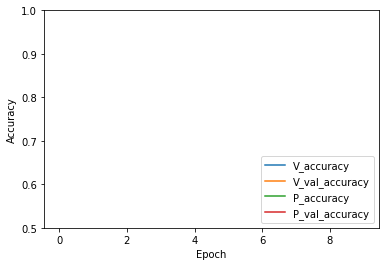

In [ ]:
plt.plot(history.history['value_net_accuracy'], label='V_accuracy')
plt.plot(history.history['val_value_net_accuracy'], label = 'V_val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.plot(history.history['policy_net_accuracy'], label='P_accuracy')
plt.plot(history.history['val_policy_net_accuracy'], label = 'P_val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Op2

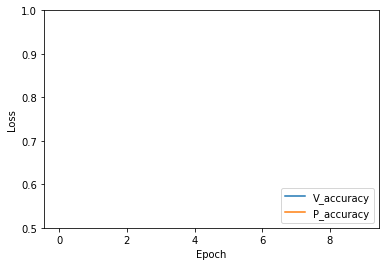

In [ ]:
plt.plot(history.history['value_net_loss'], label='V_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.plot(history.history['policy_net_loss'], label='P_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(arrtr,  arr2tr, verbose=2)
print(test_acc)

NameError: ignored

**Save Model - Necessita Google Drive para exportação **

**Save Model**

In [10]:
saved_model_path = "dotsandboxes3b"
tf.keras.models.save_model(model, saved_model_path)

INFO:tensorflow:Assets written to: dotsandboxes3b/assets


In [ ]:
model.save("dotsandboxes3.h5")

**Input e Output**

In [ ]:
saved_model_path = "dotsandboxes3_41"

In [ ]:
loaded = tf.keras.models.load_model(saved_model_path)
print(list(loaded.signatures.keys()))  # ["serving_default"]

['serving_default']


In [ ]:
#history = loaded.fit(x=arrtr, y=[arr2tr, arr3tr], batch_size=64, epochs=10, validation_data=(arrtest, [arr2test, arr3test]))
history = loaded.fit(x=gamestr, y=[policytr, valuestr], batch_size=64, epochs=100)

NameError: ignored

In [ ]:
saved_model_path = "dotsandboxes3_42"
tf.keras.models.save_model(loaded, saved_model_path)

INFO:tensorflow:Assets written to: dotsandboxes3_42/assets


In [ ]:
import pandas as pd
hist_df = pd.DataFrame(history.history) 
hist_json_file = f"Results/history-1t.json" 
with open(hist_json_file, mode='w') as f1:
    hist_df.to_json(f1)
# save to csv:  
hist_csv_file = f"Results/history-1t.csv"
with open(hist_csv_file, mode='w') as f2:
    hist_df.to_csv(f2)

In [ ]:
infer = loaded.signatures["serving_default"]
print(infer.structured_outputs)

{'policy_net': TensorSpec(shape=(None, 28), dtype=tf.float32, name='policy_net'), 'value_net': TensorSpec(shape=(None, 1), dtype=tf.float32, name='value_net')}


In [ ]:
input_tensor = model.inputs[0]
output_tensor = model.outputs[0]
output_tensor1 = model.outputs[1]
print("Inputs: "+str(input_tensor))
print("Outputs: "+str(output_tensor))
print("Outputs: "+str(output_tensor1))

Inputs: KerasTensor(type_spec=TensorSpec(shape=(None, 7, 4), dtype=tf.float32, name='state_7_4'), name='state_7_4', description="created by layer 'state_7_4'")
Outputs: KerasTensor(type_spec=TensorSpec(shape=(None, 28), dtype=tf.float32, name=None), name='policy_net/Softmax:0', description="created by layer 'policy_net'")
Outputs: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='value_net/Tanh:0', description="created by layer 'value_net'")


# Prediction

Test prediction

In [ ]:
pred = np.loadtxt(predict, dtype=float)
pred = pred.reshape(24, 7, 4)
r, v = model.predict(pred)
print(r)
print(v)

Default prediction

In [ ]:
pred = np.loadtxt(predictPath, dtype=float)
pred = pred.reshape(35, 10, 7, 4)
# binary classification
result = np.where(model.predict(pred) > .5, 1,0)
print(result)

Prediction from game

In [ ]:
pr = np.array([[[[0, 1, 1, 0],[1, 1, 1, 1],[0, 1, 1, 0],[1, 0, 0, 1],[0, 0, 0, 0],[1, 1, 0, 1],[1, 1, 1, 0]],[[0, 1, 1, 0],[1, 1, 1, 1],[0, 1, 1, 0],[1, 0, 0, 1],[1, 0, 0, 0],[1, 1, 0, 1],[1, 1, 1, 0]],[[0, 1, 1, 0],[1, 1, 1, 1],[0, 1, 1, 0],[1, 0, 0, 1],[1, 1, 0, 0],[1, 1, 0, 1],[1, 1, 1, 0]],[[1, 1, 1, 0],[1, 1, 1, 1],[0, 1, 1, 0],[1, 0, 0, 1],[1, 1, 0, 0],[1, 1, 0, 1],[1, 1, 1, 0]],[[1, 1, 1, 0],[1, 1, 1, 1],[0, 1, 1, 0],[1, 0, 0, 1],[1, 1, 0, 0],[1, 1, 1, 1],[1, 1, 1, 0]],[[1, 1, 1, 0],[1, 1, 1, 1],[0, 1, 1, 0],[1, 0, 0, 1],[1, 1, 0, 0],[1, 1, 1, 1],[1, 1, 1, 0]],[[1, 1, 1, 0],[1, 1, 1, 1],[0, 1, 1, 0],[1, 0, 0, 1],[1, 1, 0, 0],[1, 1, 1, 1],[1, 1, 1, 0]],[[1, 1, 1, 0],[1, 1, 1, 1],[0, 1, 1, 0],[1, 0, 0, 1],[1, 1, 1, 0],[1, 1, 1, 1],[1, 1, 1, 0]],[[1, 1, 1, 0],[1, 1, 1, 1],[1, 1, 1, 0],[1, 0, 0, 1],[1, 1, 1, 0],[1, 1, 1, 1],[1, 1, 1, 0]],[[1, 1, 1, 0],[1, 1, 1, 1],[1, 1, 1, 0],[1, 1, 0, 1],[1, 1, 1, 0],[1, 1, 1, 1],[1, 1, 1, 0]]]])
result = np.where(model.predict(pr) > .5, 1,0)
print(result)